# O1: Clasificacion del Fallecimiento

El objetivo de esta seccion en el proyecto es **"predecir si un paciente falleció a partir de las demas caracteristicas contenidas en el dataset"**. Esta tarea es clave para poder identificar de manera rapida, con un modelo de clasificacion, a que pacientes se les requiere un seguimiento o intervencion con prioridad

### 1. Configuracion Inicial para el desarrollo del proyecto

Para poder empezar a desarrollar el proyecto tenemos que configurar el entorno de trabajo instalando las bibliotecas necesarias requeridas:

- Pandas: para lecutar y manopulacion del dataset

- numpy: para operaciones numericas y manejo de arrays

- scikit-learn: para poder crear y evaluar modelos mediante: clasificacion, regresion, validacion cruzada, ajuste de hiperparámetros.

- matplotlib: para la visualizacion de los resultados y graficos



Primero instalamos las librerias mencionadas si no las tenemos instaladas

!pip install pandas numpy scikit-learn matplotlib

Posteriormente las importamos en nuestro proyecto para poder: cargar datos, transformarlos, dividirlos en conjuntos de entrenamiento y prueba y para luego modelarlos de forma sencilla

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


### 2. Carga y Exploracion del Dataset

Cargamos el archivo del dataset que queremos trabajar (en formato csv) e imprimimos las primeras lineas del dataset y la informacion general del DataFrame

In [26]:
# Leer el archivo CSV
df = pd.read_csv("custom_covid19.csv")

# Mostrar las primeras filas para ver el contenido
print(df.head())

# Información general del DataFrame
print(df.info())


   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2            12    1             1  9999-99-99       97          2   
1      2            12    2             1  9999-99-99       97          2   
2      2             4    2             1  9999-99-99       97          2   
3      2             9    1             1  9999-99-99       97          2   
4      1            12    2             1  9999-99-99       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HYPERTENSION  OTHER_DISEASE  \
0   41         2         2  ...       2        2             2              2   
1   57         2         1  ...       2        2             2              2   
2   38         2         2  ...       2        2             2              2   
3   68         2         2  ...       2        2             2              2   
4   63         2         2  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

Podemos ver las principales lineas del dataset en las que cada columna tiene un rango de valor dependiendo de su tipo de variable.



## 3. Procesamiento y Limpieza de Datos

### 3.1 Crear la Variable "Fallecido"

La columna "DATE_DIED" tiene el valor por defecto de "9999-99-99" cuando el paciente no esta fallecido, por lo que vamos a transformarla en una nueva variable binaria de valor 1 - yes ; 2 - no

In [27]:
df['FALLECIDO'] = df['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

Volvemos a imprimir las primeras filas del dataset para poder comprobar que se han asignado los valores de la columna "fallecido" correctamente

In [28]:
# Mostrar las primeras filas para ver el contenido
print(df.head())

# Información general del DataFrame
print(df.info())


   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2            12    1             1  9999-99-99       97          2   
1      2            12    2             1  9999-99-99       97          2   
2      2             4    2             1  9999-99-99       97          2   
3      2             9    1             1  9999-99-99       97          2   
4      1            12    2             1  9999-99-99       97          2   

   AGE  PREGNANT  DIABETES  ...  INMSUPR  HYPERTENSION  OTHER_DISEASE  \
0   41         2         2  ...        2             2              2   
1   57         2         1  ...        2             2              2   
2   38         2         2  ...        2             2              2   
3   68         2         2  ...        2             2              2   
4   63         2         2  ...        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  TEST_RESULT  ICU  \
0               2        2

### 3.2 Conversion de Variables Booleanas

Existen variables en el dataset con valores de datos erroneos/perdidos por lo que tenemos que procesarlos de forma parecida a la nueva variable y establecer valores "no determinados".

Por lo que vamos a establecer a los valores distintos a los correspondientes (1- yes , 2 - no) el valor no determinado "np.nan" a dichas variables

In [31]:
for col in columns:
    print(df[col].value_counts())

USMER
2    63139
1    36861
Name: count, dtype: int64
INTUBED
2.0    15310
1.0     3199
Name: count, dtype: int64
PNEUMONIA
2.0    85009
1.0    13414
Name: count, dtype: int64
PREGNANT
2.0    98841
1.0      807
Name: count, dtype: int64
DIABETES
2.0    87777
1.0    11880
Name: count, dtype: int64
COPD
2.0    98298
1.0     1407
Name: count, dtype: int64
ASTHMA
2.0    96706
1.0     3007
Name: count, dtype: int64
INMSUPR
2.0    98283
1.0     1386
Name: count, dtype: int64
HYPERTENSION
2.0    84182
1.0    15517
Name: count, dtype: int64
OTHER_DISEASE
2.0    96866
1.0     2678
Name: count, dtype: int64
CARDIOVASCULAR
2.0    97781
1.0     1925
Name: count, dtype: int64
OBESITY
2.0    84517
1.0    15207
Name: count, dtype: int64
RENAL_CHRONIC
2.0    97866
1.0     1839
Name: count, dtype: int64
TOBACCO
2.0    91710
1.0     7964
Name: count, dtype: int64
ICU
2.0    16840
1.0     1658
Name: count, dtype: int64


Mostramos los valores para ver si los cambios se han realizado correctamente

In [6]:
# Mostrar las primeras filas para ver el contenido
print(df.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2            12    1             1  9999-99-99      NaN        2.0   
1      2            12    2             1  9999-99-99      NaN        2.0   
2      2             4    2             1  9999-99-99      NaN        2.0   
3      2             9    1             1  9999-99-99      NaN        2.0   
4      1            12    2             1  9999-99-99      NaN        2.0   

   AGE  PREGNANT  DIABETES  ...  INMSUPR  HYPERTENSION  OTHER_DISEASE  \
0   41       2.0       2.0  ...      2.0           2.0            2.0   
1   57       2.0       1.0  ...      2.0           2.0            2.0   
2   38       2.0       2.0  ...      2.0           2.0            2.0   
3   68       2.0       2.0  ...      2.0           2.0            2.0   
4   63       2.0       2.0  ...      2.0           1.0            2.0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  TEST_RESULT  ICU  \
0             2.0      2.0

### 3.3 Deteccion de outliers

Vamos a buscar outliers en las características continuas, en este caso, en AGE

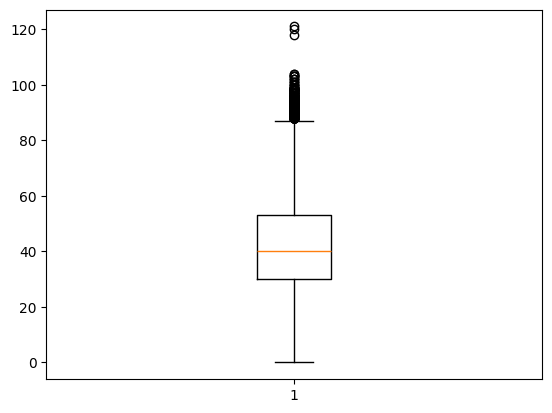

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(df['AGE'])
plt.show()

Vemos una gran cantidad de outliers, aunque es realista que haya personas de 90-100 años. Pero, no es realista que haya personas de 110-120 años. Estas instancias las eliminaremos

In [8]:
df = df[df['AGE'] < 110]

df.value_counts('AGE')



AGE
30     2603
32     2450
31     2429
28     2421
34     2414
       ... 
100       4
103       4
101       3
102       3
104       2
Name: count, Length: 105, dtype: int64

## 4. Modelado con la variable "Fallecido"

Al haber generado el modelo de clasificacion del fallecido (O1), la variable objetivo es "Fallecido" con los valores binario (1- yes ; 2- no)

### 4.1 Preparacion para la clasificaicion

Extraemos 'X' e 'Y'


In [9]:
X = df.drop(columns=['DATE_DIED', 'FALLECIDO'])
y = df['FALLECIDO']


Vamos a ver como se divide y

In [10]:
df.value_counts('FALLECIDO')

FALLECIDO
2    92659
1     7338
Name: count, dtype: int64

Se observa un gran desequilibrio en el número de fallecidos respecto a los no fallecidos. Este desbalance puede afectar negativamente al rendimiento del modelo, ya que al entrenarse mayoritariamente con instancias de personas no fallecidas, podría sesgarse hacia la clase mayoritaria, resultando en una menor capacidad de predicción para la clase minoritaria (fallecidos). Por ello usaremos class_weight = balanced

In [11]:
def train_model(x, y, param_grid, model, scoring):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,  scoring=scoring, n_jobs=-1)  
    grid_search.fit(x,y)
    return grid_search

### 4.2 Division de los datos y creacion del modelo

Para crear el modelo, dividimos los datos y entrenamos el modelo.

In [12]:

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear un imputer. En este ejemplo usaremos 'most_frequent' ya que 
# es adecuado para variables categóricas o datos discretos.
imputer = SimpleImputer(strategy='most_frequent')

# Ajustar el imputer en X_train y transformar tanto X_train como X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


Empezaremos optimizando 'accuracy' para ver como se comporta el modelo

In [13]:
# Entrenar un modelo de regresión logística y ajustar el hiperparámetro C
#Además usamos class_weight = balanced 
scoring = ['accuracy', 'recall', 'precision', 'f1']
models = []
param_grid = {'C': [0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
for sc in scoring:
    model_lr = LogisticRegression(max_iter=1000, n_jobs=-1)
    grid_lr = train_model(X_train_imputed, y_train, param_grid, model_lr, sc)
    model_lr = grid_lr.best_estimator_
    models.append(model_lr)
    # Predicciones y evaluación usando los datos imputados
    print("Scoring optimizado: ", sc)
    y_pred = model_lr.predict(X_test_imputed)
    print("Mejores hiperparámetros:", grid_lr.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Scoring optimizado:  accuracy
Mejores hiperparámetros: {'C': 0.1, 'class_weight': None}
Accuracy: 0.9469
              precision    recall  f1-score   support

           1       0.73      0.47      0.57      1506
           2       0.96      0.99      0.97     18494

    accuracy                           0.95     20000
   macro avg       0.84      0.73      0.77     20000
weighted avg       0.94      0.95      0.94     20000

Scoring optimizado:  recall
Mejores hiperparámetros: {'C': 0.1, 'class_weight': 'balanced'}
Accuracy: 0.90065
              precision    recall  f1-score   support

           1       0.43      0.92      0.58      1506
           2       0.99      0.90      0.94     18494

    accuracy                           0.90     20000
   macro avg       0.71      0.91      0.76     20000
weighted avg       0.95      0.90      0.92     20000

Scoring optimizado:  precision
Mejores hiperparámetros: {'C': 0.1, 'class_weight': None}
Accuracy: 0.9469
              precision  

## 5. Evaluacion e Interpretacion del modelo de clasificacion obtenido

### 5.1 Revision de los resultados y eleccion de modelo

Al optimizar accuracy, precision y f1-score podemos observar que los pacientes que fallecieron (tipo 1) tiene una precision del 73% y un recall del 47%, no obstante, para los no fallecidos (tipo 2) los valores son muy altos con una precision del 96% y un recall del 99%.

Esto indica que el modelo es muy bueno para poder identificar los pacientes que no fallecieron pero le cuesta predecir correctamente la clase de los fallecidos.

En cambio, al optimizar el recall, se logró detectar el 92% de los fallecimientos reales, aunque a costa de una menor precisión (43%) y un descenso en la precisión global a un 90%.

En el contexto de este problema, es preferible detectar la mayoría de los fallecimientos, incluso si eso implica cometer más falsos positivos.
Es más grave predecir que un paciente sobrevivirá y que finalmente fallezca (falso negativo), que predecir que morirá y que finalmente sobreviva (falso positivo).

Por tanto, priorizar el recall permite reducir los falsos negativos, lo cual es crítico cuando se trata de identificar a personas en riesgo.

Para poder ajustar este modelo, podemos modificar el umbral de decision o cambiar de modelo de clasificacion para intentar mejorar el recall y precision.



In [14]:
model_lr = models[1]


A continuacion, vamos a cargar los archivos CSV de validacion dado para nuestro proyecto, los cuales mostraran un conjunto de pruebas a las que debemos someter nuestro modelo


In [15]:
# Importa pandas si aún no lo has hecho
import pandas as pd

# Cargar el conjunto de prueba de características y las etiquetas verdaderas
proj_test_data = pd.read_csv("proj-test-data.csv")
proj_test_class = pd.read_csv("proj-test-class.csv")

proj_test_class['IS_DEAD']=np.where(proj_test_class['IS_DEAD'] == 1, 1, 2)
# Visualiza las primeras filas para revisar su estructura
print(proj_test_data.head())
print(proj_test_class.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      1            12    2             1  9999-99-99       97          2   
1      2            12    2             1  9999-99-99       97          2   
2      2            12    1             1  9999-99-99       97          2   
3      1             4    2             1  9999-99-99       97          2   
4      2             4    1             1  9999-99-99       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HYPERTENSION  OTHER_DISEASE  \
0   32         2         2  ...       2        2             2              2   
1   37         2         2  ...       2        2             2              2   
2   45         2         2  ...       2        2             2              2   
3   49         2         2  ...       2        2             2              2   
4   31         2         2  ...       2        2             2              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

### 5.2 Preprocesamiento del conjunto de Prueba

Para hacer que el modelo funcione, el conjunto de prueba debe de ser transformado al mismo formato al cual hemos transformado nuestro dataset base por el cual se basa nuestro modelo.

Primero eliminamos la columna DATE_DIED:


In [16]:
X_proj_test = proj_test_data.drop(columns=['DATE_DIED'])


Despues, limpiamos y aplicamos el imputer al igual que hemos hecho en el conjunto de entrenamiento:

In [17]:
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
colums = [
    'USMER', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 
    'COPD', 'ASTHMA', 'INMSUPR', 'HYPERTENSION', 'OTHER_DISEASE', 
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU'
]

for col in colums:
    X_proj_test[col] = X_proj_test[col].replace({97: np.nan, 98: np.nan, 99: np.nan})

X_proj_test_imputed = imputer.transform(X_proj_test)


### 5.3 Evaluacion del modelo de clasificacion

Por ultimo, entrenamos el modelo para predecir el resultado en los datos de prueba, el cual posteriormente compara las predicciones con las del archivo "proj-test-class.csv". Además mostraremos los resultados y la matriz de confusion

In [18]:
from sklearn.metrics import confusion_matrix
y_proj_pred = model_lr.predict(X_proj_test_imputed)

print("Accuracy en el conjunto de prueba independiente:", accuracy_score(proj_test_class, y_proj_pred))
print(classification_report(proj_test_class, y_proj_pred))

cm = confusion_matrix(proj_test_class, y_proj_pred)
print("Matriz de Confusión:")
print(cm)

Accuracy en el conjunto de prueba independiente: 0.93
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         7
           2       1.00      0.92      0.96        93

    accuracy                           0.93       100
   macro avg       0.75      0.96      0.81       100
weighted avg       0.96      0.93      0.94       100

Matriz de Confusión:
[[ 7  0]
 [ 7 86]]


Accuracy global: 93%, lo que indica un buen desempeño general en la predicción.

Fallecidos:
El modelo detectó correctamente todos los pacientes fallecidos.
Sin embargo, cuando predijo que alguien falleció, generó algunos falsos positivos, pero no omitió ningún caso crítico.

No fallecidos:
El modelo fue excelente al predecir pacientes que no fallecieron y cometió pocos errores al clasificar esta clase.


En un contexto sanitario, estos resultados son excelentes, porque se logró detectar todos los casos críticos

# O2 Predecir la edad del paciente a partir de las demas variables

El objetivo O2 consite en predecir la edad de los pacientes utilizando las demas variables que estan en el dataset. Para hacer esto, tenemos que plantear un problema de regresion en el que emplearan tecnicas de preprocesamiento como pueden ser la manipulacion de valores faltantes y la eliminacion de las columnas irrelevantes. Ademas se evaluara distintos modelos. Todo esto nos permite identificar la relacion entre las caracteristicas del paciente con su edad.

## 1. Preparacion del Dataset para la Regresion

### 1.1 Seleccionar la Variable Objetivo y las caracteristicas

Como queremos predecir la edad (AGE), la variable objetivo sera "y_age" y las caracteristicas seran el resto de columnas que creamos utiles. 

In [19]:
df = df[df['AGE'].between(0, 110)]

# Apply age binning
age_bins = [0, 45,  110] #This turns into 1 and 2
age_labels = ['0-44', '45+']
df['AGE_BIN'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)

# Drop rows where AGE_BIN is NaN (can happen if AGE was NaN before filtering)
df = df.dropna(subset=['AGE_BIN'])
X_age = df.drop(columns=['AGE', 'DATE_DIED', 'AGE_BIN','INTUBED'])  # Drop the intubed one for now bc it has lots of NaNs
y_age = df['AGE_BIN']
print(X_age)
print(y_age)

       USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA  PREGNANT  DIABETES  \
0          2            12    1             1        2.0       2.0       2.0   
1          2            12    2             1        2.0       2.0       1.0   
2          2             4    2             1        2.0       2.0       2.0   
3          2             9    1             1        2.0       2.0       2.0   
4          1            12    2             1        2.0       2.0       2.0   
...      ...           ...  ...           ...        ...       ...       ...   
99995      1            12    1             1        2.0       2.0       2.0   
99996      1            12    2             2        1.0       2.0       2.0   
99997      2            12    2             2        1.0       2.0       2.0   
99998      1            12    1             1        2.0       2.0       2.0   
99999      2            12    1             1        2.0       2.0       2.0   

       COPD  ASTHMA  INMSUPR  HYPERTENS

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_age_encoded = label_encoder.fit_transform(y_age)
y_age_encoded

array([0, 1, 0, ..., 1, 1, 1])

## 1.2 Division de los datos tanto en el Entrenamiento como en la Prueba

Tenemos que dividir el dataset en "Entrenamiento" y en "Prueba" para poder evaluar la capacidad de generalizacion del modelo.

Lo dividiremos en 80% entrenamiento y 20% prueba

In [21]:

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age_encoded, test_size=0.2, random_state=42)

## 1.3 Comprobacion de valores faltantes

Antes de entrenar el modelo, tenemos que comprobar los datos faltantes como paso en la seccion O1. Por lo que usaremos "SimpleImputer" para rellenar los valores que falten (NaN). En el caso de las variables numericas podemos usar la "mediana".


In [22]:
imputer_age = SimpleImputer(strategy='most_frequent')

X_train_age_imputed = imputer_age.fit_transform(X_train_age)
X_test_age_imputed = imputer_age.transform(X_test_age)
X_train_age_imputed

array([[ 1.,  6.,  1., ...,  7.,  2.,  2.],
       [ 1.,  8.,  1., ...,  3.,  2.,  2.],
       [ 2., 12.,  2., ...,  7.,  2.,  2.],
       ...,
       [ 1.,  4.,  1., ...,  7.,  2.,  2.],
       [ 2., 12.,  2., ...,  3.,  2.,  2.],
       [ 2.,  4.,  1., ...,  3.,  2.,  2.]])

## 1.4 Seleccion y entrenamiento del modelo de regresion

Podemos hacer dos tipos de regresion: Lineal Simple y RandomForestRegressor (No lineal)

### Opcion 1: Random Forest Classifier

En esta opcion, entrenamos un clasificador de Basque Random, la cual es eun modelo que se usa en relaciones no lineales entre las caracteristicas utiles y la edad.

In [23]:
from sklearn.ensemble import RandomForestClassifier
model_lr_age = RandomForestClassifier(random_state=42) 
model_lr_age.fit(X_train_age_imputed, y_train_age)

y_pred_lr_age = model_lr_age.predict(X_test_age_imputed)
y_pred_age_decoded = label_encoder.inverse_transform(y_pred_lr_age)
print("Accuracy:", accuracy_score(y_test_age, y_pred_lr_age))
print("\nClassification Report:\n", classification_report(y_test_age, y_pred_lr_age))
cm = confusion_matrix(y_test_age, y_pred_lr_age)
print("Matriz de Confusión:")
print(cm)
#0 es para jovenes, 1 es para personas mayores de 45. Pq experimenté otros valores y no daban buenos resultados.
#La matriz de confusion simboliza si es joven, es viejo y si fue correctamente identificado (también falta entubamiento)

#Otra forma de ser mas preciso
from sklearn.model_selection import GridSearchCV

# define un grid más amplio
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_age_imputed, y_train_age)

print("Mejores parámetros:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test_age_imputed)
print("Accuracy optimizado:", accuracy_score(y_test_age, y_pred))
print(classification_report(y_test_age, y_pred))


Accuracy: 0.7417185304155792

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     12266
           1       0.74      0.51      0.60      7658

    accuracy                           0.74     19924
   macro avg       0.74      0.70      0.71     19924
weighted avg       0.74      0.74      0.73     19924

Matriz de Confusión:
[[10896  1370]
 [ 3776  3882]]


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

Como podemos ver, aunque da un resultado válido, podria ser mejor. Los falsos positivos son muy altos todavia, y también seria buena idea reducier los falsos negativos.

### Completar(Alejandro)

## O3. Predecir idade dos pacientes mortos em base de se tiveram ou não Covid.

In [ ]:
#Conseguir todas las lineas con pacientes muertos.
mortos_df = df[df['DATE_DIED'] != '9999-99-99'].copy()
mortos_df

#resultado mejores key fold cross validation en el 1.4
# Contraejemplo, relacionar la edad con el resto de variables (enfermedades) ya que por ejemplo casos como la UCI casi siempre son personas mayores y/o con otras enfermedades
#red neuronal en el min y max

In [ ]:
#Pacientes mortos com teste COVID positivo
mortos_df['COVID_POSITIVE'] = mortos_df['TEST_RESULT'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
mortos_df

In [ ]:
X = mortos_df[['AGE']]         
y = mortos_df['COVID_POSITIVE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from scipy.stats import pearsonr

mdl = DecisionTreeRegressor(max_depth=10, random_state=0) # No, DTs are not completely deterministic, hence the random_state
mdl.fit(X_train, y_train)
preds=mdl.predict(X_test)

print("The RVE is: ", explained_variance_score(y_test, preds))
#print("The RMSE is: ", root_mean_squared_error(y_test, preds, squared=False))
      # 'squared' parameter is deprecated in 1.4 and will be removed in 1.6.
      # Use root_mean_squared_error instead to calculate the root mean squared error. 
corr, pval=pearsonr(y_test, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
print("The Maximum Error is is: ", max_error(y_test, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))


#We can't confidently predict the age of the people who did and didn't have Covid using the people who died.


## O3 Miguel

Considerando solo a las personas que murieron, ¿Podemos predecir con confianza la edad de quienes si tuvieron covid y de quiernes no?

Pruebas con 3 modelos:
1. LinearRegresion
2. KNeighborsRegressor
3. RandomForestRegressor

### 3.1 Filtrar solo pacientes fallecidos

Creamos un nuevo DataFrame `df_deceased` que contiene únicamente las filas de `df` donde `FALLECIDO == 1` (es decir, los que murieron).

In [ ]:
# ─── Bloque de preparación para O3 ───

# 1) Importaciones necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2) Recarga del CSV original
df_o3 = pd.read_csv('custom_covid19.csv')

# 3) Creamos la variable binaria 'FALLECIDO' (1=fallecido, 2=no)
df_o3['FALLECIDO'] = df_o3['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

# 4) Filtramos sólo los pacientes que sí fallecieron
df_o3 = df_o3[df_o3['FALLECIDO'] == 1].copy()

# 5) Eliminamos edades irreales
df_o3 = df_o3[df_o3['AGE'].between(0, 110)]

# 6) Generamos el indicador COVID_POSITIVE (1=tuvo COVID, 0=no)
df_o3['COVID_POSITIVE'] = df_o3['TEST_RESULT'].apply(lambda x: 1 if x in [1,2,3] else 0)


In [ ]:
# 3.1 Filtrado de pacientes fallecidos
df_deceased = df[df['FALLECIDO'] == 1].copy()
print(f"Número de pacientes fallecidos: {len(df_deceased)}")
df_deceased.head()


Número de pacientes fallecidos: 7338


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,TEST_RESULT,ICU,FALLECIDO
26,1,4,2,2,24/05/2020,2.0,2.0,69,2.0,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,7,2.0,1
33,1,3,1,1,25/06/2020,NaN,1.0,60,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,NaN,1
38,2,4,2,2,14/07/2020,2.0,2.0,75,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
40,2,12,2,2,29/06/2020,2.0,1.0,65,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1
50,1,12,2,2,20/07/2020,2.0,1.0,58,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1


### 3.2 Creamos la variable binaria COVID_POSITIVE en la que apartir de TEST_RESULT podemos definir:

1 si el paciente tuvo COVID (TEST_RESULT en [1,2,3])

0 en caso contrario

In [ ]:
# 3.2 Generación de COVID_POSITIVE
df_deceased['COVID_POSITIVE'] = df_deceased['TEST_RESULT'].apply(lambda x: 1 if x in [1,2,3] else 0)
df_deceased[['TEST_RESULT','COVID_POSITIVE']].drop_duplicates().sort_values('TEST_RESULT')


,TEST_RESULT,COVID_POSITIVE
343,1,1
40,2,1
33,3,1
967,4,0
218,5,0
248,6,0
26,7,0


### 3.3 Preparar la matriz de features X_m y vector objetivo y_m

X_m (caracteristicas): solo la columna COVID_POSITIVE

Y_m (objetivo): la edad real AGE

In [ ]:
# 3.3 Definición de X_m e y_m
X_m = df_deceased[['COVID_POSITIVE']]   # matriz n×1 con el indicador de COVID
y_m = df_deceased['AGE']                # vector de edades
print("Shape X_m:", X_m.shape)
print("Shape y_m:", y_m.shape)


Shape X_m: (7338, 1)
Shape y_m: (7338,)


### 3.4 Division en entrenamiento y prueba

Usamos un split 70-30% para evaluar la capacidad de generalizacion


In [ ]:
# 3.4 División train/test
from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_m, y_m,
    test_size=0.30,
    random_state=42
)
print("Entrenamiento:", X_train_m.shape, "Prueba:", X_test_m.shape)

Entrenamiento: (5136, 1) Prueba: (2202, 1)


### 3.5 Entrenar y evaluar varios regresores

1. Regresion Lineal

2. K-Nearest Neighboors Regressor

3. Random Forest Regressor

Y comparamos MAE, MSE y R2

In [ ]:
# 3.5 Entrenamiento y evaluación de modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

modelos = {
    'LinearRegression'      : LinearRegression(),
    'KNeighborsRegressor'   : KNeighborsRegressor(n_neighbors=5),
    'RandomForestRegressor' : RandomForestRegressor(n_estimators=100, random_state=42)
}

for nombre, modelo in modelos.items():
    # Ajuste
    modelo.fit(X_train_m, y_train_m)
    # Predicción
    y_pred_m = modelo.predict(X_test_m)
    # Métricas
    mae = mean_absolute_error(y_test_m, y_pred_m)
    mse = mean_squared_error(y_test_m, y_pred_m)
    r2  = r2_score(y_test_m, y_pred_m)
    print(f"\n--- {nombre} ---")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"R² : {r2:.3f}")



--- LinearRegression ---
MAE: 12.154
MSE: 243.599
R² : 0.000

--- KNeighborsRegressor ---
MAE: 12.663
MSE: 276.453
R² : -0.134

--- RandomForestRegressor ---
MAE: 12.154
MSE: 243.608
R² : 0.000


MAE (Mean Absolute Error): error medio en años

MSE (Mean Square Error): penaliza mas los errores grandes

R2: proporcion de varianza explicada por el modelo ( 1 = perfecto, 0 = ninguna capacidad predictiva) valor entre 0-1

Si el valor de R2 es menor de 0.3, podemos concluir que no podemos predecir la edad solo con si tuvieron COVID

In [ ]:
def limpieza(df):
    df = df.copy()

    df['FALLECIDO'] = df['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)
    
    df.drop(columns=['DATE_DIED'], inplace=True)

    columns = df.columns.drop(['AGE'])

    for col in columns:
        df[col] = df[col].replace({97: np.nan, 98: np.nan, 99: np.nan})

    df['TEST_RESULT'] = df['TEST_RESULT'].apply(lambda x: 1 if x in [1,2,3] else 0)
    non_binary_columns = ['AGE', 'MEDICAL_UNIT']

    df = df[df['AGE'].between(0, 110)]

    binary_cols = df.columns.drop(non_binary_columns)

    df[binary_cols] = df[binary_cols].replace({1:1, 2:0})
    return df

In [ ]:
# ### O3.b: Contraejemplo – Predecir FALLECIDO con todas las variables disponibles

import pandas as pd
import numpy as np

from sklearn.model_selection   import train_test_split, GridSearchCV
from sklearn.pipeline          import Pipeline
from sklearn.compose           import ColumnTransformer
from sklearn.impute            import SimpleImputer
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.ensemble          import RandomForestClassifier
from sklearn.metrics           import accuracy_score, classification_report, confusion_matrix

# 1) Carga y limpieza (usa tu función ya definida)
df_full = pd.read_csv("custom_covid19.csv")
df_full = limpieza(df_full)        # aplica DATE_DIED→FALLECIDO, imputación de códigos 97/98/99, binarización, filtro de AGE

# 2) Definir X e y para clasificación de FALLECIDO
X_full = df_full.drop(columns=['FALLECIDO'])
y_full = df_full['FALLECIDO']

# 3) Identificar columnas categóricas y numéricas
#    En este dataset prácticamente todas son discretas/categóricas binarias o de códigos
cat_cols = X_full.columns.tolist()
num_cols = []  # si tuvieras columnas realmente numéricas, las listarías aquí

# 4) Preprocesador
preprocessor_full = ColumnTransformer([
    ("imputer_cat", SimpleImputer(strategy="most_frequent"), cat_cols),
    ("onehot",      OneHotEncoder(handle_unknown="ignore"),  cat_cols),
], remainder="drop", sparse_threshold=0)

# 5) Pipeline con escalado (opcional para RF) y modelo
pipe_full = Pipeline([
    ("pre",   preprocessor_full),
    ("scale", StandardScaler(with_mean=False)),  # with_mean=False para sparse / after one-hot
    ("clf",   RandomForestClassifier(random_state=42))
])

# 6) GridSearchCV sobre algunos hiperparámetros clave
param_grid_full = {
    "clf__n_estimators":    [100, 300],
    "clf__max_depth":       [None, 10, 20],
    "clf__min_samples_split":[2, 5],
    "clf__class_weight":    [None, "balanced"]
}

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_full, y_full, test_size=0.33, random_state=42, stratify=y_full)

grid_full = GridSearchCV(
    pipe_full,
    param_grid_full,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid_full.fit(X_train_f, y_train_f)

# 7) Evaluación
best_full = grid_full.best_estimator_
y_pred_f = best_full.predict(X_test_f)

print("Mejores parámetros:", grid_full.best_params_)
print("Accuracy (test):", accuracy_score(y_test_f, y_pred_f))
print("\nClassification Report:\n", classification_report(y_test_f, y_pred_f, target_names=["No Fallecido","Fallecido"]))
print("Matriz de Confusión:\n", confusion_matrix(y_test_f, y_pred_f))



===== Version: COVID_only =====

  -- LinearRegression --
  MAE: 12.124
  MSE: 240.782
  R² : 0.001

  -- KNeighborsRegressor --
  MAE: 13.190
  MSE: 278.672
  R² : -0.157

  -- RandomForestRegressor --
  MAE: 12.125
  MSE: 240.777
  R² : 0.001

===== Version: COVID_plus_gravedad =====

  -- LinearRegression --
  MAE: 12.123
  MSE: 239.977
  R² : 0.004

  -- KNeighborsRegressor --
  MAE: 12.211
  MSE: 242.797
  R² : -0.008

  -- RandomForestRegressor --
  MAE: 12.157
  MSE: 241.505
  R² : -0.002

===== Version: All_features =====

  -- LinearRegression --
  MAE: 11.365
  MSE: 215.223
  R² : 0.107

  -- KNeighborsRegressor --
  MAE: 12.473
  MSE: 252.750
  R² : -0.049

  -- RandomForestRegressor --
  MAE: 12.370
  MSE: 249.553
  R² : -0.036


In [ ]:
# ——————————————————————————————————————————
# O3.b: Comparación de versiones para predecir AGE en fallecidos
# ——————————————————————————————————————————

import pandas as pd
import numpy as np

from sklearn.model_selection   import train_test_split
from sklearn.impute            import SimpleImputer
from sklearn.linear_model      import LinearRegression
from sklearn.neighbors         import KNeighborsRegressor
from sklearn.ensemble          import RandomForestRegressor
from sklearn.metrics           import mean_absolute_error, mean_squared_error, r2_score

# 1) Filtrar sólo fallecidos y crear COVID_POSITIVE
df_deceased = df_o3[df_o3['FALLECIDO'] == 1].copy()
df_deceased['COVID_POSITIVE'] = df_deceased['TEST_RESULT'].apply(lambda x: 1 if x in [1,2,3] else 0)

#Las dropeamos ya que no se usan en el modelo
drop_cols = ['AGE','FALLECIDO','DATE_DIED','TEST_RESULT']

# 2) Definir tres conjuntos de predictores
features_sets = {
    'COVID_only': ['COVID_POSITIVE'],
    'COVID_plus_gravedad': ['COVID_POSITIVE', 'INTUBED', 'ICU'],
    'All_features': [c for c in df_deceased.columns if c not in drop_cols]
}

# 3) Configurar modelos a probar
modelos = {
    'LinearRegression'      : LinearRegression(),
    'KNeighborsRegressor'   : KNeighborsRegressor(n_neighbors=5),
    'RandomForestRegressor' : RandomForestRegressor(random_state=42)
}

# 4) Bucle de entrenamiento/evaluación
for set_name, feats in features_sets.items():
    print(f"\n===== Version: {set_name} =====")
    
    # a) Definir X_m y y_m
    X_m = df_deceased[feats]
    y_m = df_deceased['AGE']
    
    # b) Train/Test split
    X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
        X_m, y_m, test_size=0.33, random_state=42
    )
    
    # c) Imputar NaNs si los hay
    imp = SimpleImputer(strategy='most_frequent')
    X_train_imp = imp.fit_transform(X_train_m)
    X_test_imp  = imp.transform(X_test_m)
    
    # d) Probar cada modelo
    for nombre, modelo in modelos.items():
        modelo.fit(X_train_imp, y_train_m)               # ajuste
        y_pred = modelo.predict(X_test_imp)              # predicción
        
        mae = mean_absolute_error(y_test_m, y_pred)
        mse = mean_squared_error(y_test_m, y_pred)
        r2  = r2_score(y_test_m, y_pred)
        
        print(f"\n  -- {nombre} --")
        print(f"  MAE: {mae:.3f}")
        print(f"  MSE: {mse:.3f}")
        print(f"  R² : {r2:.3f}")



===== Version: COVID_only =====

  -- LinearRegression --
  MAE: 12.124
  MSE: 240.782
  R² : 0.001

  -- KNeighborsRegressor --
  MAE: 13.190
  MSE: 278.672
  R² : -0.157

  -- RandomForestRegressor --
  MAE: 12.125
  MSE: 240.777
  R² : 0.001

===== Version: COVID_plus_gravedad =====

  -- LinearRegression --
  MAE: 12.106
  MSE: 240.338
  R² : 0.002

  -- KNeighborsRegressor --
  MAE: 12.398
  MSE: 252.542
  R² : -0.048

  -- RandomForestRegressor --
  MAE: 12.121
  MSE: 239.705
  R² : 0.005

===== Version: All_features =====

  -- LinearRegression --
  MAE: 11.958
  MSE: 235.897
  R² : 0.021

  -- KNeighborsRegressor --
  MAE: 12.540
  MSE: 252.603
  R² : -0.048

  -- RandomForestRegressor --
  MAE: 12.329
  MSE: 249.316
  R² : -0.035
